In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                           precision_score, recall_score, roc_auc_score,
                           roc_curve, precision_recall_curve)
import warnings
warnings.filterwarnings('ignore')


In [5]:
plt.style.use('default')
sns.set_palette("husl")

In [7]:
print("\n1. Loading Dataset...")
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')



1. Loading Dataset...


In [8]:
print(f"Dataset shape: {X.shape}")
print(f"Target distribution:\n{pd.Series(data.target_names)[y].value_counts()}")
print(f"Features: {len(data.feature_names)} numerical features")

# Display first few rows and basic info
print("\nFirst 5 rows of features:")
print(X.head())
print(f"\nTarget values: 0 = {data.target_names[0]}, 1 = {data.target_names[1]}")


Dataset shape: (569, 30)
Target distribution:
benign       357
malignant    212
Name: count, dtype: int64
Features: 30 numerical features

First 5 rows of features:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4  

In [10]:
print("\n2. Train/Test Split and Standardization...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features standardized using StandardScaler")
print(f"Mean of first feature before scaling: {X_train.iloc[:, 0].mean():.3f}")
print(f"Mean of first feature after scaling: {X_train_scaled[:, 0].mean():.3f}")
print(f"Std of first feature after scaling: {X_train_scaled[:, 0].std():.3f}")


2. Train/Test Split and Standardization...
Training set: 455 samples
Test set: 114 samples
Features standardized using StandardScaler
Mean of first feature before scaling: 14.067
Mean of first feature after scaling: -0.000
Std of first feature after scaling: 1.000


In [11]:
print("\n3. Training Logistic Regression Model...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)
y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

print("Model trained successfully!")
print(f"Model coefficients shape: {lr_model.coef_.shape}")
print(f"Model intercept: {lr_model.intercept_[0]:.3f}")


3. Training Logistic Regression Model...
Model trained successfully!
Model coefficients shape: (1, 30)
Model intercept: 0.302


In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Confusion Matrix:
[[41  1]
 [ 1 71]]

Classification Metrics:
Precision: 0.9861
Recall: 0.9861
ROC-AUC: 0.9954

Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114




5. Creating Visualizations...


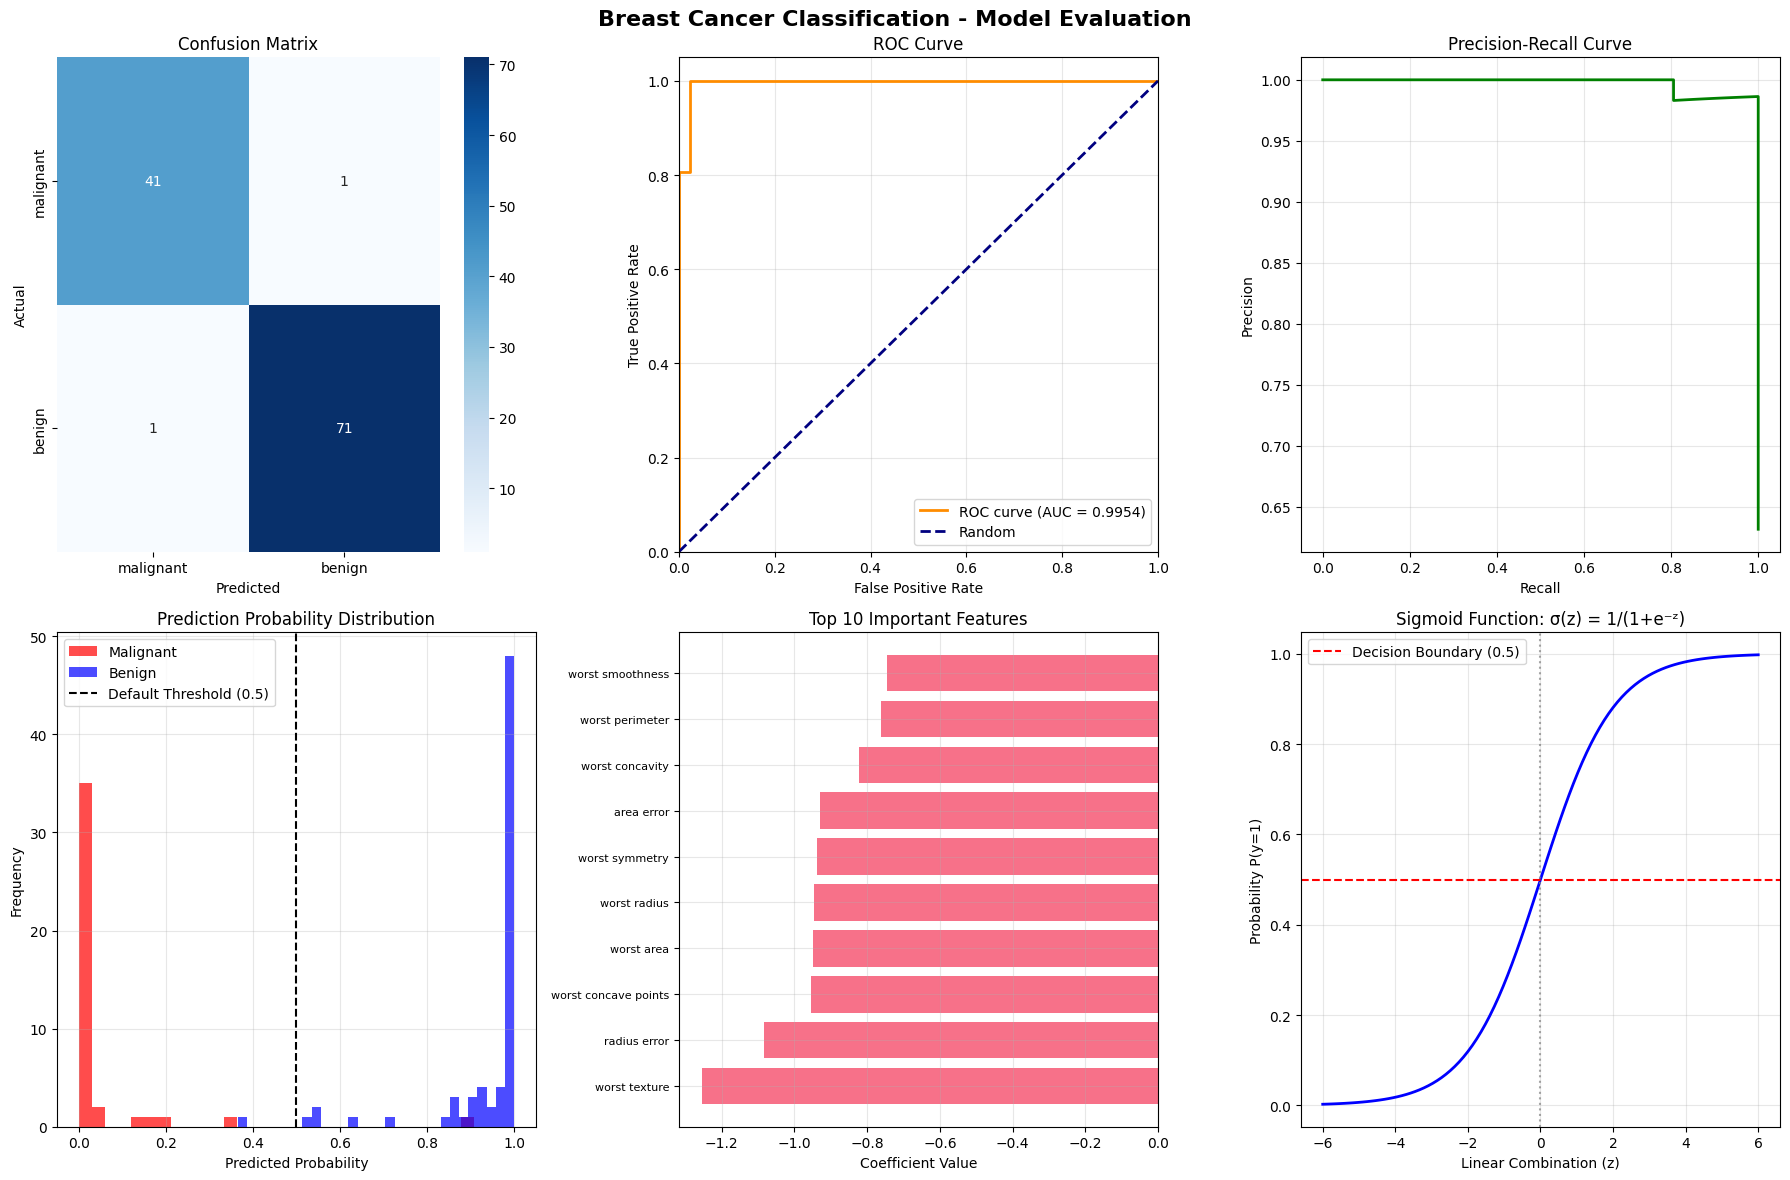

In [14]:
print("\n5. Creating Visualizations...")

# Create subplots for comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Breast Cancer Classification - Model Evaluation', fontsize=16, fontweight='bold')

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0],
            xticklabels=data.target_names, yticklabels=data.target_names)
axes[0,0].set_title('Confusion Matrix')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
axes[0,1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
axes[0,1].set_xlim([0.0, 1.0])
axes[0,1].set_ylim([0.0, 1.05])
axes[0,1].set_xlabel('False Positive Rate')
axes[0,1].set_ylabel('True Positive Rate')
axes[0,1].set_title('ROC Curve')
axes[0,1].legend(loc="lower right")
axes[0,1].grid(True, alpha=0.3)

# Precision-Recall Curve
precision_curve, recall_curve, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
axes[0,2].plot(recall_curve, precision_curve, color='green', lw=2)
axes[0,2].set_xlabel('Recall')
axes[0,2].set_ylabel('Precision')
axes[0,2].set_title('Precision-Recall Curve')
axes[0,2].grid(True, alpha=0.3)

# Prediction Probability Distribution
axes[1,0].hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, label='Malignant', color='red')
axes[1,0].hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Benign', color='blue')
axes[1,0].axvline(x=0.5, color='black', linestyle='--', label='Default Threshold (0.5)')
axes[1,0].set_xlabel('Predicted Probability')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Prediction Probability Distribution')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Feature Importance (Top 10 coefficients)
feature_importance = pd.DataFrame({
    'feature': data.feature_names,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False).head(10)

axes[1,1].barh(range(len(feature_importance)), feature_importance['coefficient'])
axes[1,1].set_yticks(range(len(feature_importance)))
axes[1,1].set_yticklabels(feature_importance['feature'], fontsize=8)
axes[1,1].set_xlabel('Coefficient Value')
axes[1,1].set_title('Top 10 Important Features')
axes[1,1].grid(True, alpha=0.3)

# Sigmoid Function Explanation
x_sigmoid = np.linspace(-6, 6, 100)
y_sigmoid = 1 / (1 + np.exp(-x_sigmoid))
axes[1,2].plot(x_sigmoid, y_sigmoid, 'b-', linewidth=2)
axes[1,2].axhline(y=0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
axes[1,2].axvline(x=0, color='gray', linestyle=':', alpha=0.7)
axes[1,2].set_xlabel('Linear Combination (z)')
axes[1,2].set_ylabel('Probability P(y=1)')
axes[1,2].set_title('Sigmoid Function: σ(z) = 1/(1+e⁻ᶻ)')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Threshold tuning results:
    threshold  precision  recall  f1_score
0        0.10     0.9351  1.0000    0.9664
1        0.15     0.9474  1.0000    0.9730
2        0.20     0.9730  1.0000    0.9863
3        0.25     0.9730  1.0000    0.9863
4        0.30     0.9730  1.0000    0.9863
5        0.35     0.9730  1.0000    0.9863
6        0.40     0.9861  0.9861    0.9861
7        0.45     0.9861  0.9861    0.9861
8        0.50     0.9861  0.9861    0.9861
9        0.55     0.9855  0.9444    0.9645
10       0.60     0.9855  0.9444    0.9645
11       0.65     0.9853  0.9306    0.9571
12       0.70     0.9853  0.9306    0.9571
13       0.75     0.9851  0.9167    0.9496
14       0.80     0.9851  0.9167    0.9496
15       0.85     0.9848  0.9028    0.9420

Optimal threshold based on F1-score: 0.200


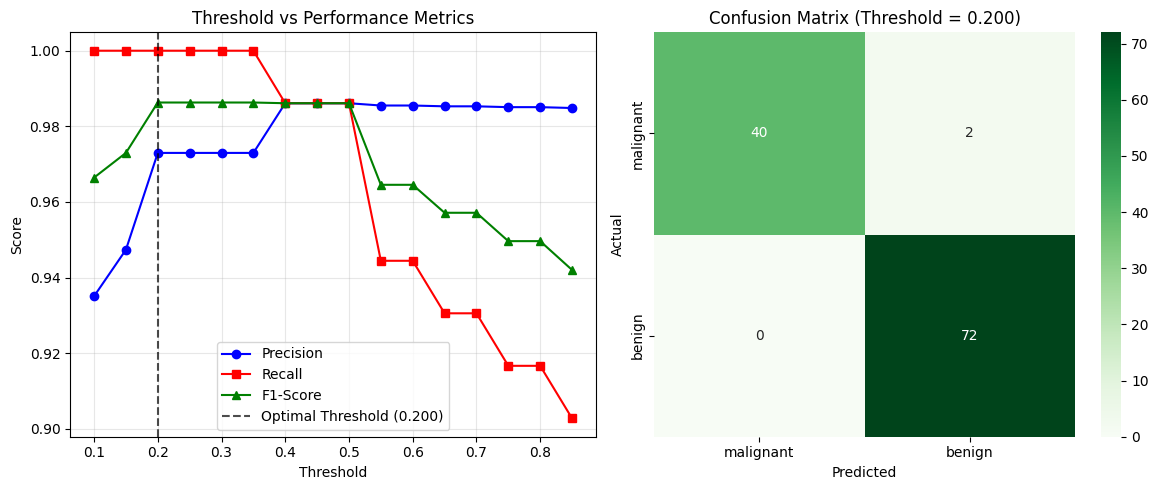

In [15]:
# Test different thresholds
thresholds = np.arange(0.1, 0.9, 0.05)
results = []

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    precision_thresh = precision_score(y_test, y_pred_thresh)
    recall_thresh = recall_score(y_test, y_pred_thresh)
    f1_thresh = 2 * (precision_thresh * recall_thresh) / (precision_thresh + recall_thresh)

    results.append({
        'threshold': threshold,
        'precision': precision_thresh,
        'recall': recall_thresh,
        'f1_score': f1_thresh
    })

results_df = pd.DataFrame(results)
print("Threshold tuning results:")
print(results_df.round(4))

# Find optimal threshold based on F1 score
optimal_threshold = results_df.loc[results_df['f1_score'].idxmax(), 'threshold']
print(f"\nOptimal threshold based on F1-score: {optimal_threshold:.3f}")

# Plot threshold analysis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(results_df['threshold'], results_df['precision'], 'o-', label='Precision', color='blue')
plt.plot(results_df['threshold'], results_df['recall'], 's-', label='Recall', color='red')
plt.plot(results_df['threshold'], results_df['f1_score'], '^-', label='F1-Score', color='green')
plt.axvline(x=optimal_threshold, color='black', linestyle='--', alpha=0.7,
            label=f'Optimal Threshold ({optimal_threshold:.3f})')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Performance Metrics')
plt.legend()
plt.grid(True, alpha=0.3)

# Apply optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
cm_optimal = confusion_matrix(y_test, y_pred_optimal)

plt.subplot(1, 2, 2)
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Greens',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title(f'Confusion Matrix (Threshold = {optimal_threshold:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [16]:
print(f"\n📈 Final Model Performance Summary:")
print("=" * 50)
print(f"Default Threshold (0.5):")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  ROC-AUC: {roc_auc:.4f}")

precision_opt = precision_score(y_test, y_pred_optimal)
recall_opt = recall_score(y_test, y_pred_optimal)
f1_opt = 2 * (precision_opt * recall_opt) / (precision_opt + recall_opt)

print(f"\nOptimal Threshold ({optimal_threshold:.3f}):")
print(f"  Precision: {precision_opt:.4f}")
print(f"  Recall: {recall_opt:.4f}")
print(f"  F1-Score: {f1_opt:.4f}")

print(f"\n🎯 Model successfully distinguishes between malignant and benign tumors!")
print(f"🔬 The logistic regression model achieved {roc_auc:.1%} ROC-AUC score.")


📈 Final Model Performance Summary:
Default Threshold (0.5):
  Precision: 0.9861
  Recall: 0.9861
  ROC-AUC: 0.9954

Optimal Threshold (0.200):
  Precision: 0.9730
  Recall: 1.0000
  F1-Score: 0.9863

🎯 Model successfully distinguishes between malignant and benign tumors!
🔬 The logistic regression model achieved 99.5% ROC-AUC score.


📊 THE SIGMOID FUNCTION σ(z) = 1 / (1 + e⁻ᶻ)

🔹 Purpose: Maps any real number to a value between 0 and 1, perfect for probabilities

🔹 Input (z): Linear combination = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ
   - Where β₀ is intercept, βᵢ are coefficients, xᵢ are features

🔹 Output: Probability that the instance belongs to class 1 (Benign in our case)

🔹 Key Properties:
   • When z = 0  → σ(z) = 0.5 (decision boundary)
   • When z → +∞ → σ(z) → 1   (confident positive prediction)
   • When z → -∞ → σ(z) → 0   (confident negative prediction)
   • S-shaped curve (smooth transition)
   • Derivative: σ'(z) = σ(z) × (1 - σ(z))

🔹 Decision Rule:
   • If σ(z) ≥ threshold → Predict class 1 (Benign)
   • If σ(z) < threshold → Predict class 0 (Malignant)
   • Default threshold = 0.5, but can be tuned based on business needs

🔹 Advantages:
   ✅ Outputs interpretable probabilities
   ✅ Smooth, differentiable (good for gradient descent)
   ✅ No outlier sensitivity (bounded output)
   ✅ Computationally efficient